<a id='intro'></a>
## I. Introduction
Welcome to this Jupyter Notebook project, where our aim is to perform Exploratory Data Analysis (EDA) and data cleaning on a dataset containing information on over 10,000 movies. We will delve deep into this dataset from The Movie Database (TMDb) to uncover interesting insights.

Our strategy involves the following steps:

1. Load data and conduct statistical analysis for data understanding. <br>
2. Define business questions to guide our analysis. <br>
3. Clean and transform the data for analysis. <br>
4. Analyze the data to identify trends and patterns. <br>
5. Draw conclusions based on our findings. <br>

Let's begin our journey of exploring and analyzing this movie dataset! <br>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

from sklearn.ensemble import RandomForestRegressor

stop_words = set(stopwords.words("english"))

<a id='wrangling'></a>
## II. Data Wrangling

### 1. General Properties

In [34]:
# Load data
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [35]:
# See the number of row and column of data
movies.shape

(4803, 20)

We have 4803 records and 31 columns.

In [36]:
movies.describe(include='object')

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


In [37]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


During our analysis of the movie dataset, we uncovered several intriguing insights:

- Genre Distribution: The genre that appears most frequently in the dataset is "Drama." This indicates that drama movies are highly represented in the collection of over 10,000 movies.

- Language Composition: An overwhelming majority, approximately 93%, of the movies in the dataset are in English. This suggests that English-language films dominate the dataset.

- Budget Range: The budgets of the movies in our dataset range from 0 to 380 million dollars. This wide range highlights the varying financial investments made in producing these films.

- Revenue Range: The revenues generated by the movies in our dataset span from 0 to 2.7 billion dollars. This indicates the potential profitability of movies and the diverse financial success they can achieve.

- Voting Popularity: The number of votes received for each movie in the dataset ranges from 0 to 13,752 votes. This information provides an insight into the level of audience engagement and interest in these films.

- These interesting findings add depth and context to our understanding of the movie dataset, and they serve as a foundation for further analysis and exploration.

### 2. Define Some business question to analyze



1. Which genres are most popular from year to year?

2. Which genres are most popular each year?

3. Which genres received highest review from year to year?

4. Which genres had highest revenue/budget from year to year?

5. Do the higher budget make the higher revenue?

6. Which factors impact to the increasing of revenue?

### 3. Data Cleaning

First, I will remove some columns that are unnecessary to answer my question.

In [38]:

movies.drop(columns=['homepage', 'id', 'overview', 'original_title', 'keywords', 'original_language', 'production_companies', 'production_countries', 'runtime', 'status', 'spoken_languages'], inplace=True)
movies.head()

,budget,genres,popularity,release_date,revenue,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2009-12-10,2787965087,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,2007-05-19,961000000,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,2015-10-26,880674609,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,2012-07-16,1084939099,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,2012-03-07,284139100,"Lost in our world, found in another.",John Carter,6.1,2124


In [39]:
# Function to convert string column to dict column
def str_to_dict(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return {}

movies['genres'] = movies['genres'].apply(str_to_dict)
movies.head()

,budget,genres,popularity,release_date,revenue,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",150.437577,2009-12-10,2787965087,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",139.082615,2007-05-19,961000000,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",107.376788,2015-10-26,880674609,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",112.312950,2012-07-16,1084939099,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",43.926995,2012-03-07,284139100,"Lost in our world, found in another.",John Carter,6.1,2124


In [40]:
# Function to extract the genre names
def extract_names(row):
    names = []
    for item in row:
        if 'name' in item:
            names.append(item['name'])
    return names

movies['genres'] = movies['genres'].apply(extract_names)
movies.head()

,budget,genres,popularity,release_date,revenue,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2009-12-10,2787965087,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",139.082615,2007-05-19,961000000,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",107.376788,2015-10-26,880674609,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,2012-07-16,1084939099,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,2012-03-07,284139100,"Lost in our world, found in another.",John Carter,6.1,2124


Then I split each genre into columns and use one-hot encoding to encode each genre

In [41]:
# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply one-hot encoding on the 'genres' column
encoded_genres = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_)

# Concatenate the encoded channels with the original DataFrame
movies = pd.concat([movies, encoded_genres], axis=1)
movies.head()

,budget,genres,popularity,release_date,revenue,tagline,title,vote_average,vote_count,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2009-12-10,2787965087,Enter the World of Pandora.,Avatar,7.2,11800,1,...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[Adventure, Fantasy, Action]",139.082615,2007-05-19,961000000,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[Action, Adventure, Crime]",107.376788,2015-10-26,880674609,A Plan No One Escapes,Spectre,6.3,4466,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,2012-07-16,1084939099,The Legend Ends,The Dark Knight Rises,7.6,9106,1,...,0,0,0,0,0,0,0,1,0,0
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,2012-03-07,284139100,"Lost in our world, found in another.",John Carter,6.1,2124,1,...,0,0,0,0,0,1,0,0,0,0


In [42]:
# Calculate the number of year since the movies release

movies['release_date'] = pd.to_datetime(movies['release_date'])
current_date = pd.to_datetime('today').date()
movies['num_year_since_release'] = round(((current_date.year - movies['release_date'].dt.year)*12 + (current_date.month - movies['release_date'].dt.month))/12, 2)
movies.head()

,budget,genres,popularity,release_date,revenue,tagline,title,vote_average,vote_count,Action,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,num_year_since_release
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2009-12-10,2787965087,Enter the World of Pandora.,Avatar,7.2,11800,1,...,0,0,0,0,1,0,0,0,0,13.50
1,300000000,"[Adventure, Fantasy, Action]",139.082615,2007-05-19,961000000,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1,...,0,0,0,0,0,0,0,0,0,16.08
2,245000000,"[Action, Adventure, Crime]",107.376788,2015-10-26,880674609,A Plan No One Escapes,Spectre,6.3,4466,1,...,0,0,0,0,0,0,0,0,0,7.67
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,2012-07-16,1084939099,The Legend Ends,The Dark Knight Rises,7.6,9106,1,...,0,0,0,0,0,0,1,0,0,10.92
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,2012-03-07,284139100,"Lost in our world, found in another.",John Carter,6.1,2124,1,...,0,0,0,0,1,0,0,0,0,11.25


In [43]:
# Calculate the number of votings by year of each movies

movies['vote_count_by_year'] = movies['vote_count']/movies['num_year_since_release']
movies.head()

,budget,genres,popularity,release_date,revenue,tagline,title,vote_average,vote_count,Action,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,num_year_since_release,vote_count_by_year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2009-12-10,2787965087,Enter the World of Pandora.,Avatar,7.2,11800,1,...,0,0,0,1,0,0,0,0,13.50,874.074074
1,300000000,"[Adventure, Fantasy, Action]",139.082615,2007-05-19,961000000,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1,...,0,0,0,0,0,0,0,0,16.08,279.850746
2,245000000,"[Action, Adventure, Crime]",107.376788,2015-10-26,880674609,A Plan No One Escapes,Spectre,6.3,4466,1,...,0,0,0,0,0,0,0,0,7.67,582.268579
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,2012-07-16,1084939099,The Legend Ends,The Dark Knight Rises,7.6,9106,1,...,0,0,0,0,0,1,0,0,10.92,833.882784
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,2012-03-07,284139100,"Lost in our world, found in another.",John Carter,6.1,2124,1,...,0,0,0,1,0,0,0,0,11.25,188.800000


Now, I have a data set cleaned enough to explore data

<a id='eda'></a>
## III. Exploratory Data Analysis


### 1. Which genres are most popular from year to year?

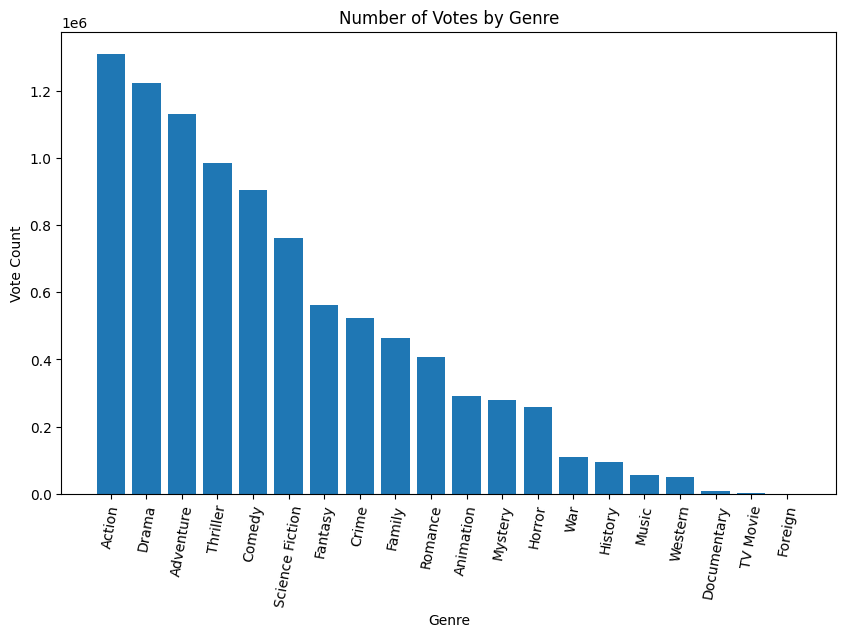

In [44]:
# Create a list containing list of genres
genres_list = list(mlb.classes_)
genre_vote_count = []

# Calculate the vote count for each genre
for genre in genres_list:
    vote_count = movies.loc[movies[genre] == 1, 'vote_count'].sum()
    genre_vote_count.append(vote_count)

# Create a new DataFrame to store the genre names and their corresponding vote counts
genre_vote_df = pd.DataFrame({'Genre': genres_list, 'Vote_Count': genre_vote_count})

# Sort the DataFrame in descending order based on vote counts
genre_vote_df = genre_vote_df.sort_values(by='Vote_Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
plt.bar(genre_vote_df['Genre'], genre_vote_df['Vote_Count'])
plt.xlabel('Genre')
plt.ylabel('Vote Count')
plt.title('Number of Votes by Genre')
plt.xticks(rotation=80)  # Adjust the rotation angle as needed
plt.show()

We can observe that Action, Drama, Adventure, Thriller, Comedy and Science Fiction are top 6 genres that most popular from year to year. They also have the number of votings significantly more than other genres. These genres consistently attract a substantial number of votes, indicating their widespread appeal and audience engagement.

On the other hand, War, history, music, westernm documentary and TV movie are the least popular. Movies falling within these genres tend to have fewer than 200,000 votes, suggesting a narrower audience reach and potentially lower levels of overall popularity.


### 2. Which genres are most popular each year?

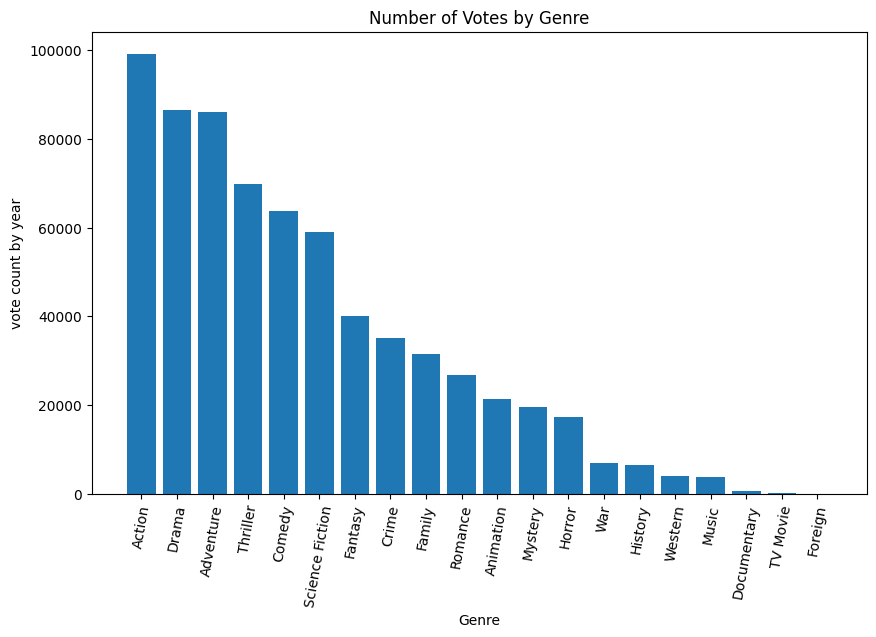

In [45]:
# Create a list containing list of genres
genres_list = list(mlb.classes_)
genre_vote_count = []

# Calculate the vote count for each genre
for genre in genres_list:
    vote_count = movies.loc[movies[genre] == 1, 'vote_count_by_year'].sum()
    genre_vote_count.append(vote_count)

# Create a new DataFrame to store the genre names and their corresponding vote counts
genre_vote_df = pd.DataFrame({'Genre': genres_list, 'vote_count_by_year': genre_vote_count})

# Sort the DataFrame in descending order based on vote counts
genre_vote_df = genre_vote_df.sort_values(by='vote_count_by_year', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
plt.bar(genre_vote_df['Genre'], genre_vote_df['vote_count_by_year'])
plt.xlabel('Genre')
plt.ylabel('vote count by year')
plt.title('Number of Votes by Genre')
plt.xticks(rotation=80)  # Adjust the rotation angle as needed
plt.show()

In our analysis of the dataset, we have examined the number of votes received by movies in each year. Interestingly, the findings mirror our earlier observations, reinforcing the popularity of certain genres across multiple years. The top six consistently popular genres, known for attracting a substantial number of votes: Action, Drama, Adventure, Thriller, Comedy, Science Fiction.

Conversely, we have also noticed that certain genres tend to be less popular, receiving relatively fewer votes over time. These genres include: War, History, Music, Western, Documentary, TV Movie. Movies categorized within these genres generally have a lower number of votes, suggesting a narrower audience reach and potentially lower levels of overall popularity.

These consistent trends in genre popularity across different years offer valuable insights into audience preferences and can assist filmmakers, researchers, and industry professionals in making informed decisions regarding genre selection and target demographics.

### 3. Which genres received highest review from year to year?

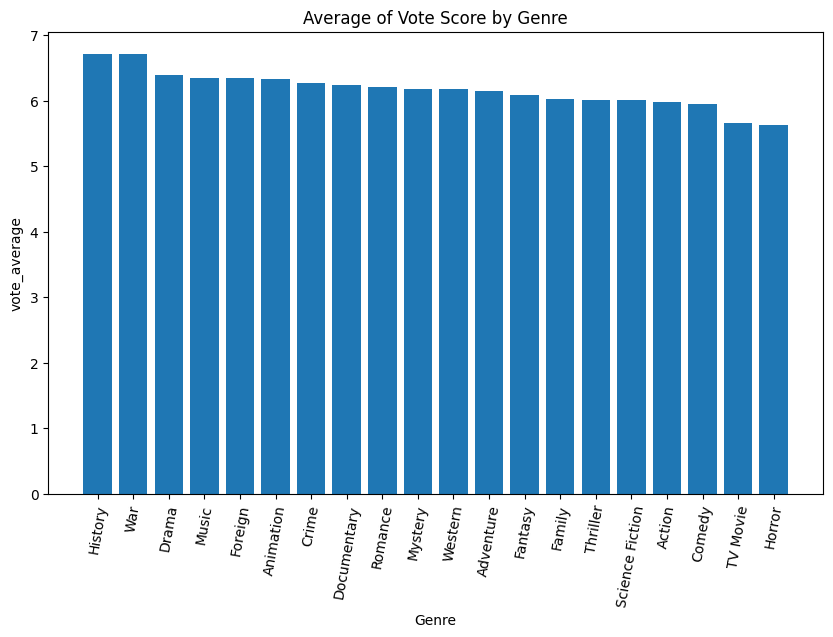

In [51]:
# Create a list containing list of genres
genres_list = list(mlb.classes_)
genre_vote_count = []

# Calculate the vote count for each genre
for genre in genres_list:
    vote_count = movies.loc[movies[genre] == 1, 'vote_average'].mean()
    genre_vote_count.append(vote_count)

# Create a new DataFrame to store the genre names and their corresponding vote counts
genre_vote_df = pd.DataFrame({'Genre': genres_list, 'vote_average': genre_vote_count})

# Sort the DataFrame in descending order based on vote counts
genre_vote_df = genre_vote_df.sort_values(by='vote_average', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
plt.bar(genre_vote_df['Genre'], genre_vote_df['vote_average'])
plt.xlabel('Genre')
plt.ylabel('vote_average')
plt.title('Average of Vote Score by Genre')
plt.xticks(rotation=80)  # Adjust the rotation angle as needed
plt.show()


Our analysis uncovers an interesting pattern in the ratings of different genres. Despite receiving fewer votes, genres like History, War, and Music consistently rank among the top genres with the highest ratings. On the other hand, genres like Science Fiction, Action, and Comedy, which are widely popular, tend to have lower average ratings.

This highlights the distinction between popularity and critical acclaim. Genres with lower vote counts, such as History, War, and Music, often deliver movies that are highly regarded and appreciated by viewers. In contrast, genres with higher vote counts, like Science Fiction, Action, and Comedy, may struggle to consistently achieve high ratings.

Understanding this difference can help filmmakers and enthusiasts appreciate the diversity of audience preferences and make informed decisions when creating or selecting movies in different genres.


### 4. Which genres are highest average revenue/budget from year to year?

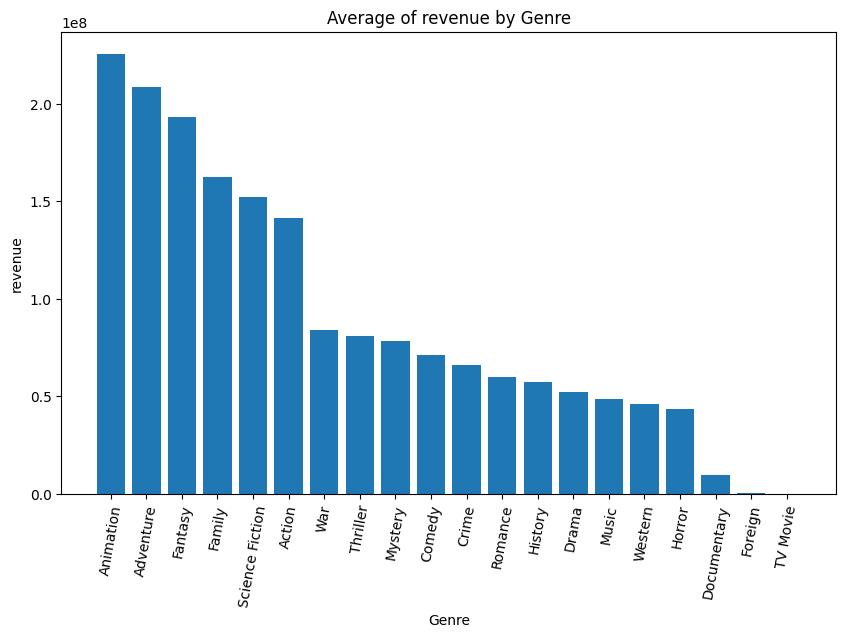

In [47]:
# Create a list containing list of genres
genres_list = list(mlb.classes_)
genre_vote_count = []

# Calculate the vote count for each genre
for genre in genres_list:
    vote_count = movies.loc[movies[genre] == 1, 'revenue'].mean()
    genre_vote_count.append(vote_count)

# Create a new DataFrame to store the genre names and their corresponding vote counts
genre_vote_df = pd.DataFrame({'Genre': genres_list, 'revenue': genre_vote_count})

# Sort the DataFrame in descending order based on vote counts
genre_vote_df = genre_vote_df.sort_values(by='revenue', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
plt.bar(genre_vote_df['Genre'], genre_vote_df['revenue'])
plt.xlabel('Genre')
plt.ylabel('revenue')
plt.title('Average of revenue by Genre')
plt.xticks(rotation=80)  # Adjust the rotation angle as needed
plt.show()


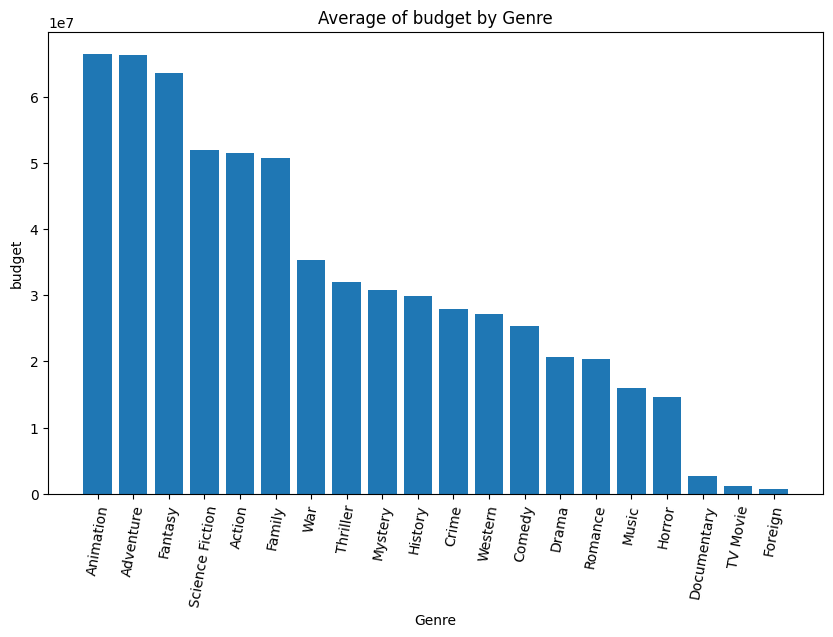

In [48]:
# Create a list containing list of genres
genres_list = list(mlb.classes_)
genre_vote_count = []

# Calculate the vote count for each genre
for genre in genres_list:
    vote_count = movies.loc[movies[genre] == 1, 'budget'].mean()
    genre_vote_count.append(vote_count)

# Create a new DataFrame to store the genre names and their corresponding vote counts
genre_vote_df = pd.DataFrame({'Genre': genres_list, 'budget': genre_vote_count})

# Sort the DataFrame in descending order based on vote counts
genre_vote_df = genre_vote_df.sort_values(by='budget', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
plt.bar(genre_vote_df['Genre'], genre_vote_df['budget'])
plt.xlabel('Genre')
plt.ylabel('budget')
plt.title('Average of budget by Genre')
plt.xticks(rotation=80)  # Adjust the rotation angle as needed
plt.show()


Our analysis reveals a noteworthy relationship between revenue and budget across different genres. Genres like Animation, Adventure, Fantasy, and Science Fiction have the highest revenue, but they also tend to have the highest budgets. Conversely, genres such as Documentary, TV Movie, and Foreign have the lowest revenue and budget.

This suggests that higher-budget productions in genres like Animation, Adventure, Fantasy, and Science Fiction have the potential to generate substantial revenue. In contrast, genres with lower budgets, such as Documentary, TV Movie, and Foreign, face challenges in achieving significant financial success.

### 5. Do the higher budget make the higher revenue?

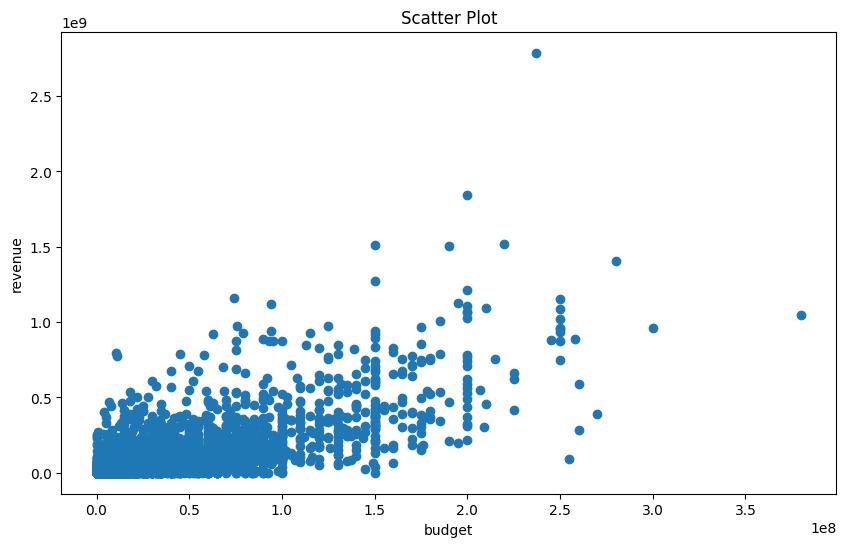

In [49]:
# Add labels and title
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
plt.scatter(movies['budget'], movies['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Scatter Plot')
plt.show()

Upon examining the data, we can observe a modest correlation between revenue and budget. The scatter plot visualization reveals that higher budgets tend to correspond to higher revenues.

This relationship suggests that movies with larger financial investments have the potential to generate higher revenues. While it is not a definitive rule, the general trend indicates that a higher budget can contribute to increased revenue for a movie.

By recognizing this connection, filmmakers and industry professionals can make informed decisions when allocating resources and estimating potential revenue outcomes for their projects.

### 6. Which factors impact to the increasing of revenue?

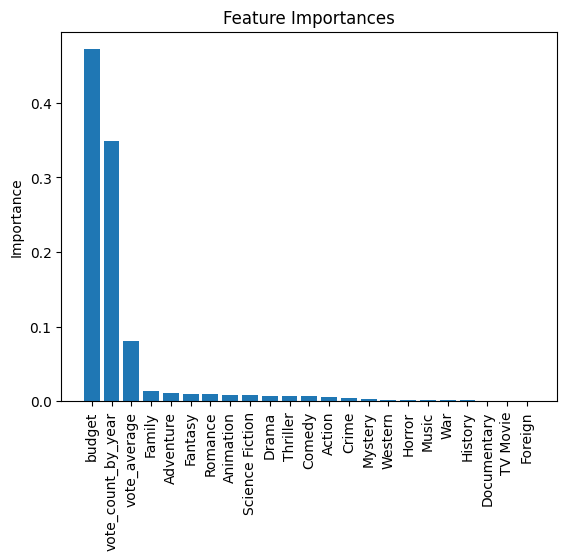

In [50]:
# Select relevant features
selected_features = ['budget', 'revenue', 'vote_average', 'Action', 'Adventure',
                    'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
                    'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
                    'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'vote_count_by_year']

# Remove redundant or uninformative features
movies_selected = movies[selected_features].dropna()

# Split the data into training and test sets
train_size = int(len(movies_selected) * 0.8)
train_df = movies_selected[:train_size]
test_df = movies_selected[train_size:]

# Set X and y variables for training and test sets
X_train = train_df.drop('revenue', axis=1)
y_train = train_df['revenue']
X_test = test_df.drop('revenue', axis=1)
y_test = test_df['revenue']

# Fit Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Sort feature importances in descending order
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances as bar chart
plt.bar(feature_importances.index, feature_importances.values)
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Several factors have been identified as impactful contributors to the increase in movie revenue. Among these factors, the budget has the most significant influence on revenue, followed by the number of votes received per year and the average rating.

The budget allocated to a movie plays a crucial role in its revenue potential. Higher budgets often lead to increased production values, marketing efforts, and overall visibility, which can attract larger audiences and generate higher revenue.

Moreover, certain genres, such as Family, Adventure, Romance, Fantasy, and Animation, have been found to have a particularly strong impact on revenue. Movies within these genres often attract a dedicated fan base and have a higher likelihood of generating significant revenue.

By understanding these influential factors, filmmakers and industry professionals can make informed decisions to optimize revenue generation and maximize the success of their movies.

<a id='conclusions'></a>
## IV. Conclusions

In this project, we conducted an exploratory analysis of a dataset comprising information on over 10,000 movies from The Movie Database (TMDb). We aimed to gain insights into various aspects of the data, including genre popularity, ratings, revenue, and budget. Here are the key findings:

q. Genre Popularity: Action, Drama, Adventure, Thriller, Comedy, and Science Fiction emerged as the most popular genres consistently over the years. These genres garnered a significant number of votes, indicating widespread appeal and audience engagement. Conversely, War, History, Music, Western, Documentary, and TV Movie genres were found to be less popular, with relatively fewer votes.

2. Genre Ratings: Genres such as History, War, and Music consistently received high ratings, despite their lower popularity. In contrast, popular genres like Science Fiction, Action, and Comedy tended to have lower average ratings. This highlights the distinction between popularity and critical acclaim.

3. Revenue and Budget: Animation, Adventure, Fantasy, and Science Fiction genres had the highest revenue figures, but they also had the highest budgets. Conversely, Documentary, TV Movie, and Foreign genres exhibited the lowest revenue and budget values. This suggests that higher-budget productions in certain genres have the potential to generate significant revenue.

4. Impact on Revenue: Factors influencing revenue include the budget, number of votes received per year, average rating, and genre. Higher budgets generally correlate with higher revenues. Additionally, genres such as Family, Adventure, Romance, Fantasy, and Animation were found to have a stronger impact on revenue.

In conclusion, our analysis provides valuable insights into the dynamics of the movie industry. Understanding genre preferences, the relationship between revenue and budget, and the factors influencing revenue can assist filmmakers and industry professionals in making informed decisions regarding genre selection, resource allocation, and revenue projections for their projects.